## Lesson 3.7

This section follows lesson 3.7 of the EdX Data 8 class, which is not based on the textbook. It's a simple introduction to bar charts with Pandas.

First, let's load more data. Let's have a look at your top and saved tracks.

In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
from dataspot import user_tracks_csv
user_tracks_csv()
with open('data/user_tracks.csv', 'r') as csv_file:
    user_tracks = pd.read_csv(csv_file, parse_dates=[2])

CSV file exists, use force=True to recreate it if needed


Let's have a look at the info the Spotify API gives us on tracks. There's a few extra bits we didn't save to the CSV file to keep things simple. This time, we'll look at the first 50 entries to see if any patterns stand out. I didn't set an index this time, so Pandas created one automatically by assigning numbers starting from 0. I have some really long song names, so they wouldn't make the best index.

In [45]:
user_tracks.head(25)

,name,artist_name,release_date,duration,popularity,track_number,total_tracks,album_name,album_type,explicit,id,uri
0,Stranger,HWYS,2017-02-17,286,0,1,11,"Lisbon Lux Records, Vol. 3",COMPILATION,False,5BIvWWby6PF8EndeARSGnB,spotify:track:5BIvWWby6PF8EndeARSGnB
1,Blowin' in the Wind Tunnel,Jori Hulkkonen,2020-03-23,435,6,1,17,Primitivo,ALBUM,False,7iDMgr0yeIVd4szc0o5HSt,spotify:track:7iDMgr0yeIVd4szc0o5HSt
2,Positive Up (feat. Face-T),Poirier,2016-03-04,255,2,1,11,Migration,ALBUM,False,4o0a1GIWMJfyre6HRDI6wu,spotify:track:4o0a1GIWMJfyre6HRDI6wu
3,Mastermind,Róisín Murphy,2016-07-08,395,14,1,9,Take Her up to Monto,ALBUM,False,6QNkLUwipUu4QMGyCeJQd0,spotify:track:6QNkLUwipUu4QMGyCeJQd0
4,6n Jaakaappi,Jori Hulkkonen,2018-10-12,167,3,1,12,Simple Music for Complicated People,ALBUM,False,0UguJpy6UqnwofixXFeHjy,spotify:track:0UguJpy6UqnwofixXFeHjy
5,Ultralight Beam,Kanye West,2016-06-10,320,76,1,20,The Life Of Pablo,ALBUM,True,1eQBEelI2NCy7AUTerX0KS,spotify:track:1eQBEelI2NCy7AUTerX0KS
6,Black Rainbow,Jori Hulkkonen,2018-10-12,275,5,2,12,Simple Music for Complicated People,ALBUM,False,35z2TCShdYfHWZw9pJmu51,spotify:track:35z2TCShdYfHWZw9pJmu51
7,The Combine,John Maus,2017-10-27,218,47,1,12,Screen Memories,ALBUM,False,6JyGk2O6Mb1dNG474bJf77,spotify:track:6JyGk2O6Mb1dNG474bJf77
8,Above the Bosphorus,Debruit,2016-05-27,150,7,1,12,Débruit & Istanbul,ALBUM,False,2mCNwFAzDgrzXeYnanhUmG,spotify:track:2mCNwFAzDgrzXeYnanhUmG
9,Tintån Terdel,Jori Hulkkonen,2017-11-24,376,0,1,13,Don't Believe In Happiness,ALBUM,False,5n1n8Evk3YHT550ec0qIpN,spotify:track:5n1n8Evk3YHT550ec0qIpN


Does anything strike you at first glance? Maybe you just see a bunch of names and numbers without any pattern. In my case, I noticed there were a surprising number of first tracks in my top songs. This could be just my imagination, so I'll try to confirm this by playing with the data. We'll also see if your data has the same pattern.

 I can create a simple new table with the `value_counts` method. This will tell us how many of our top songs have which track numbers. Don't worry about the part of the code after `value_counts`. It's just used to format the output into a new DataFrame with clear names. If you deleted everything after `value_counts()`, you would see the same numbers, just not identified. Try it if you want!

In [66]:
track_counts = user_tracks['track_number'].value_counts().rename_axis('track number').to_frame('count')
track_counts.sort_index(inplace=True) #To show the values in order of track numbers instead of count values
track_counts

,count
track number,
1,53
2,7
3,7
4,6
5,8
6,7
7,5
8,4
9,5


In my case, the pattern is very clear! There are more than 6 times as many first tracks in my top songs as any other track number. Is the pattern there in your data too? Maybe it's not as clear? Let's put together a simple horizontal bar graph that will give us a visual indication. We can do this using the `plot.barh` method, which is actually a wrapper for the matplotlib module.

<AxesSubplot:ylabel='track number'>

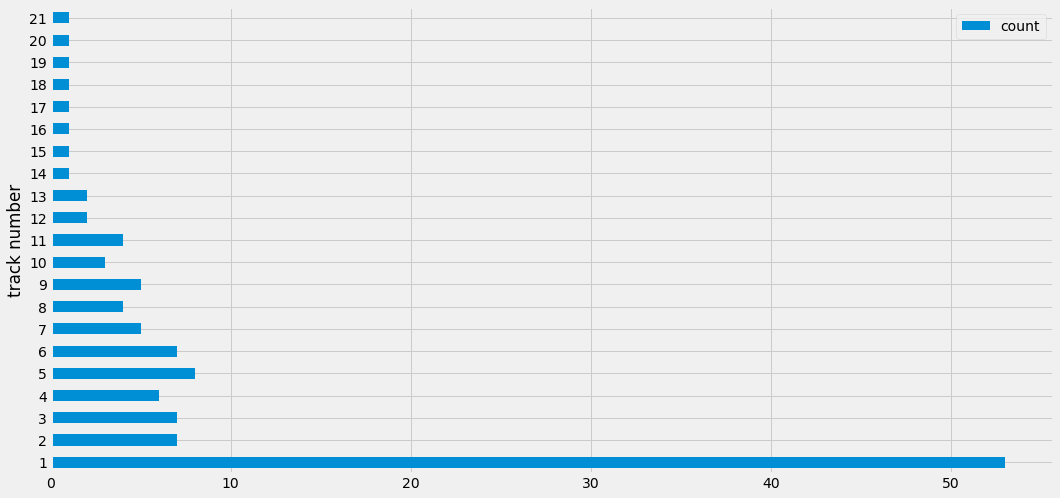

In [67]:
track_counts.plot.barh(figsize=(16,8)) #You can change the figsize(x,y) values to play around with the plot size

Is the pattern clear now? If not, I may have spotted a pattern that was unique to me. If you see it in your data too, that's a sign it could be more general. Either way, maybe we can try to figure out why it's there!

My first thought was that maybe I listen to a lot of singles! If you listen to single track albums, you'll obviously listen to a lot of first tracks. Let's put together another bar graph and see:

In [71]:
type_counts = user_tracks['album_type'].value_counts().rename_axis('album type').to_frame('count')
type_counts

,count
album type,
ALBUM,115
SINGLE,5
COMPILATION,1


In my case, that's definitely not the answer! Almost all of my top songs come from albums instead of singles. But let's create another bar graph in case your data is less obvious.

<AxesSubplot:ylabel='album type'>

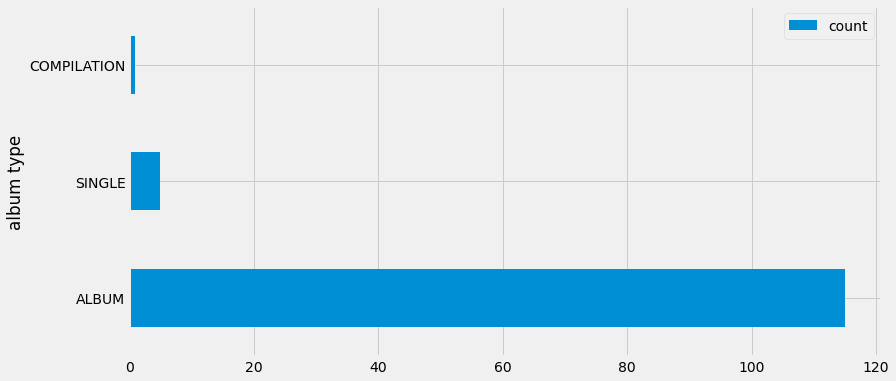

In [70]:
type_counts.plot.barh(figsize=(12,6)) #You can change the figsize(x,y) values to play around with the plot size

I don't know if that was the answer for you, but it wasn't for me. There are a lot of possibilities to explore. It could be due to my listening habits. Maybe I start albums and don't finish them? It could also be due to the specifics of Spotify's top tracks algorithm. Maybe when I want to play a whole album, I click play on the first song instead of on the album itself? Or maybe it's a sign of a deeper pattern in the recording industry, with the strongest songs first in case people don't listen to the whole album. In fact, all of these things could be true, or all false. When we're exploring the data like this, we're looking for ideas, not trying to prove an answer.

Just for fun, let's do one final bar graph. We'll compare the popularity of a song with its release date. I wonder if more recent songs are more popular in general? It will also serve as a simple example of the code needed to show a bar graph of two columns in a DataFrame. Let's compare our most recent ten tracks with our oldest ten tracks.

<AxesSubplot:ylabel='name'>

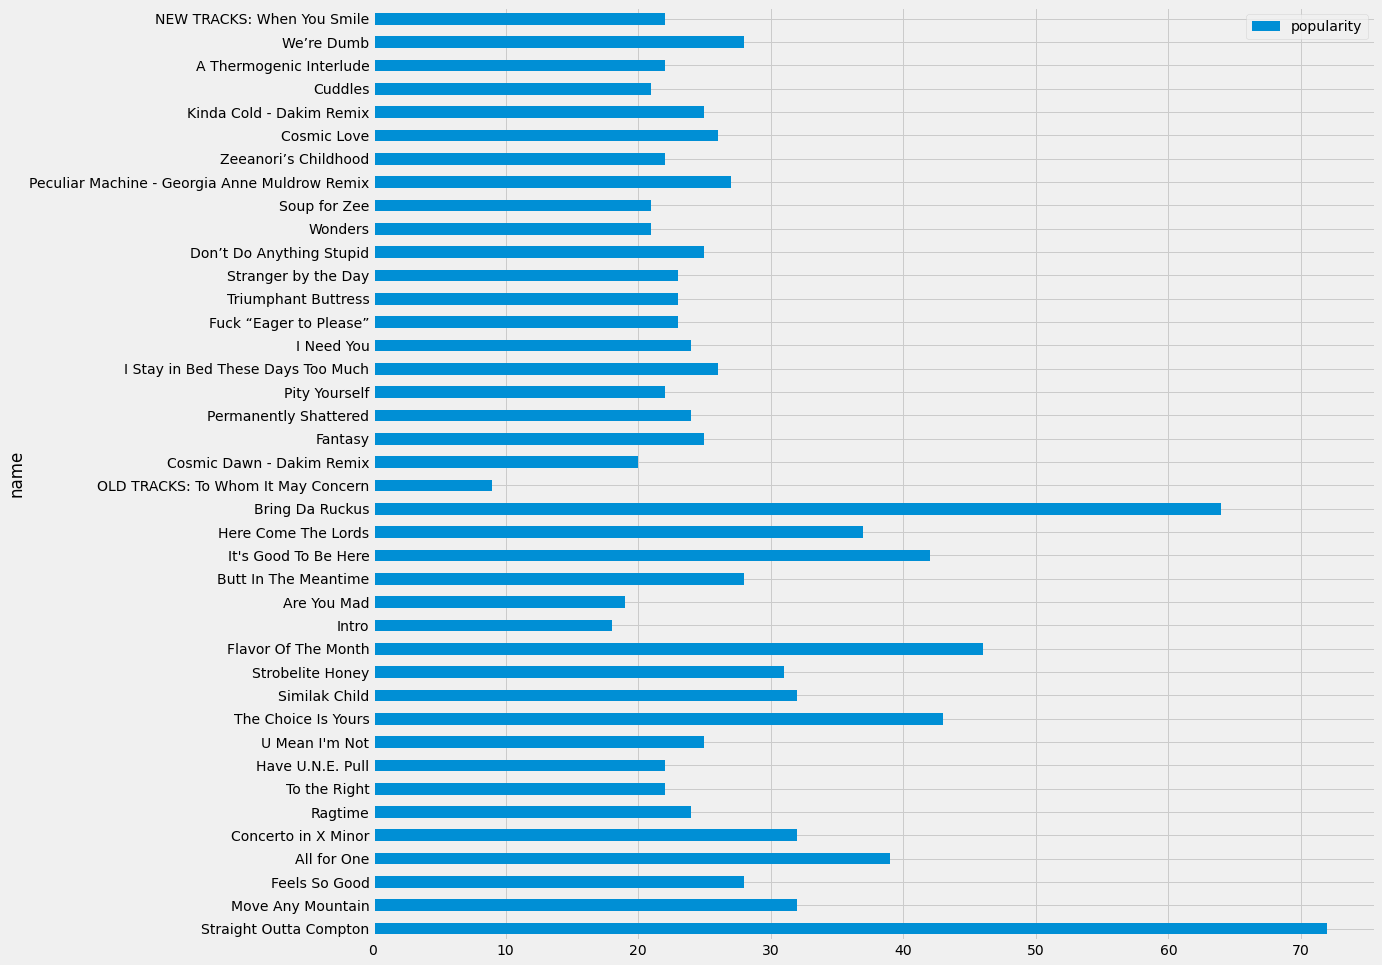

In [125]:
tracks_by_date = user_tracks.sort_values('release_date')
old_tracks = tracks_by_date.head(20)
new_tracks = tracks_by_date.tail(20)
new_tracks
old_tracks.iat[19,0] = 'OLD TRACKS: ' + old_tracks.iat[19,0] #This is a way to change the value of a single cell
new_tracks.iat[19,0] = 'NEW TRACKS: ' + new_tracks.iat[19,0] 
old_and_new = old_tracks.append(new_tracks) #This is a simple way to combine two DataFrames with identical shapes
old_and_new.plot.barh(y='popularity', x='name', figsize=(16,16))

In my case, my intuition was wrong! Seems like the modern stuff I listen to is pretty obscure, while some of my older favorites are classics that are still popular. How about you?